Analysis of Total Factor Productivity Around the World

Alex Lee

This tutorial shows a data science pipeline for analyzing the agricultural productivity of countries and regions around the world over the past 60 years. This analysis focuses on total factor productivity, which is one of the most informative measures of international agricultural productivity. Why is it important to look at and study agricultural productivity? Agricultural productivity is a measure of the efficiency with which agricultural resources, such as land, labor, and capital, are used to produce food and other agricultural products. It is an important subject to study for a number of reasons:

Food security: Increasing agricultural productivity can help to increase food production, which is important for meeting the needs of a growing global population. This is particularly important in developing countries, where food insecurity is a major issue.

Economic development: A more productive agricultural sector can contribute to economic development by generating income and employment opportunities in rural areas, which can help to reduce poverty.

Environmental sustainability: Agricultural productivity can be improved through the use of sustainable farming practices, such as the use of organic fertilizers and crop rotation, which can help to preserve natural resources and protect the environment.

Climate change: Agricultural productivity is also important in the context of climate change, as it can help to increase the efficiency of food production and reduce greenhouse gas emissions from the agricultural sector.

Overall, studying agricultural productivity is important for addressing a range of challenges related to food security, economic development, environmental sustainability, and climate change. We will be using data from the USDA Economic Research Service's data product on International Agricultural Productivity (IAP), which provides the annual indices of agricultural TFP for countries and regions of the world beginning in 1961 and ending to 2020. The series was last updated in October 7, 2022. 
https://www.ers.usda.gov/data-products/international-agricultural-productivity/

In [81]:
import pandas as pd
# import the csv file using pandas
df = pd.read_csv("AgTFPInternational2020_long.csv")
df.rename(columns={'Country/Territory': 'Country'}, inplace=True)
df

,Order,FAO,ISO3,Level,Country,Region,Income,Year,TFP_Index,Outall_Index,...,Land_Q,Labor_Q,Capital_Q,Machinery_Q,Livestock_Q,Fertilizer_Q,Feed_Q,Cropland_Q,Pasture_Q,IrrigArea_Q
0,1,159.0,NGA,Country,Nigeria,SSA,MI-L,1961,86.5804,19.5115,...,2.198449e+04,11420.1475,1.422840e+04,2.061200e+01,7.024060e+03,2.161665e+04,7.758364e+06,20954.9840,2.600000e+04,200.0000
1,1,159.0,NGA,Country,Nigeria,SSA,MI-L,1962,87.6861,20.3487,...,2.231379e+04,11627.2974,1.478031e+04,2.261200e+01,7.265570e+03,2.348724e+04,8.241102e+06,21284.2840,2.600000e+04,200.0000
2,1,159.0,NGA,Country,Nigeria,SSA,MI-L,1963,87.0572,21.2221,...,2.415995e+04,11840.0065,1.539133e+04,2.461200e+01,7.539890e+03,2.531378e+04,8.596522e+06,23130.4420,2.600000e+04,200.0000
3,1,159.0,NGA,Country,Nigeria,SSA,MI-L,1964,87.3097,21.8586,...,2.483889e+04,12058.9075,1.601928e+04,2.661200e+01,7.824220e+03,2.556539e+04,8.516781e+06,23809.3850,2.600000e+04,200.0000
4,1,159.0,NGA,Country,Nigeria,SSA,MI-L,1965,86.1499,22.7648,...,2.645080e+04,12283.7767,1.721042e+04,4.061200e+01,8.179220e+03,2.717722e+04,8.943053e+06,25421.2940,2.600000e+04,200.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,243,NaN,NaN,Region,NaN,G20 (19 countries 2021),NaN,2016,101.6680,101.7251,...,1.243977e+06,481284.9228,3.995280e+06,2.236022e+06,1.191882e+06,1.592013e+08,2.885579e+09,885980.5888,1.628312e+06,214470.0666
13332,243,NaN,NaN,Region,NaN,G20 (19 countries 2021),NaN,2017,104.6567,105.1509,...,1.249681e+06,472232.4342,4.104074e+06,2.276166e+06,1.204587e+06,1.583811e+08,2.991555e+09,887794.2355,1.657323e+06,215797.8895
13333,243,NaN,NaN,Region,NaN,G20 (19 countries 2021),NaN,2018,106.0598,106.3834,...,1.249286e+06,461882.1800,4.216871e+06,2.308464e+06,1.208838e+06,1.568847e+08,3.009592e+09,887969.7809,1.643916e+06,216816.8026
13334,243,NaN,NaN,Region,NaN,G20 (19 countries 2021),NaN,2019,105.8433,106.7507,...,1.253635e+06,448426.2779,4.323576e+06,2.354034e+06,1.189710e+06,1.622938e+08,3.126475e+09,887471.6416,1.648720e+06,219884.9000


In the data collection process, we imported the data from the ERS website as a csv in the wide format. This step was qite easily because the governemnt agency made the data easily available on its website.

In the data managenment/representation phase, we looked through the data that we imported. We can see that it lists many different countries with each row observation being a year from 1961 to 2020. It includes a lot of data for each row, including index of agricultural TFP, index of total agricultural output, index of total agricultural input, index of total agricultural land input, etc. In the country column, there were missing values NaN but I decided to keep these because these were listed under where the region was a socioeconomic organization, and therefore it was an organization of multiple countries. The NaN values did not hinder later analysis

In [82]:
# Looking at the value counts of Country and Regions
df['Level'].value_counts()

Country    10187
Region      2849
Income       240
World         60
Name: Level, dtype: int64

In [83]:
# Looking at the Countries under Region
df[df['Level']=='Region']['Country'].value_counts()

SSA, Nigeria              60
OCEANIA                   60
North Africa              60
CWANA                     60
Europe, Eastern           60
Europe, Central           60
Europe, Northern          60
Europe, Southern          60
Europe, Western           60
EUROPE, Total             60
NORTH AMERICA             60
SSA, Western              60
DC                        60
LDC                       60
Ethiopia, former          60
Sudan, former             60
Czechslovakia, former     60
Belgium-Luxembourg        60
Yugoslavia, former        60
Former Soviet Union       60
West Asia                 60
Central Asia              60
ASIA, Total               60
ASIA, Total LDC           60
SSA, Central              60
SSA, Eastern              60
SSA, Horn                 60
SSA, Sahel                60
SSA, Southern             60
SSA, SACU                 60
SSA, Total                60
Central America           60
Caribbean                 60
SA, Andean                60
SA, Brazil    

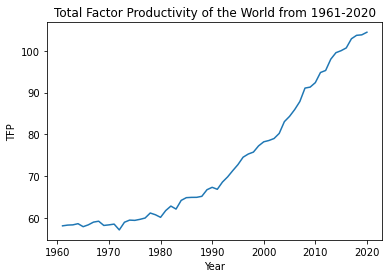

In [ ]:
import matplotlib.pyplot as plt
# plotting global TFP
fig, ax = plt.subplots()
ax.plot(df.Year.unique(), df[df['Level']=='World'].TFP_Index)
ax.set_xlabel("Year")
ax.set_ylabel("TFP")
ax.set_title("Total Factor Productivity of the World from 1961-2020")
plt.show()

In the data exploratory analysis part, we first plotted TFP against year, and we can see that the total global TFP increases as time goes on. This makes sense since the total population and thus agricultural output to feed the population both increase together.

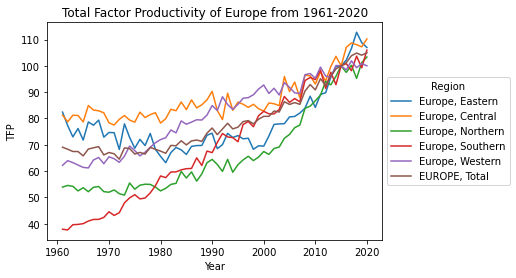

In [ ]:
import numpy as np
import seaborn as sns

df_europe = df[(df['Country'].str.contains("Europe,")) | (df['Country']=='EUROPE, Total')]

fg = sns.lineplot(x='Year', y='TFP_Index', hue='Country', data=df_europe, legend=False)
fg.set(xlabel='Year', ylabel='TFP', title='Total Factor Productivity of Europe from 1961-2020')
plt.legend(bbox_to_anchor=(1,0.5), loc='center left', frameon=True, title='Region', labels=df_europe.Country.unique())
plt.show()

We then looked at the TFP over time for each region of Europe. As a whole, there is a positive trend for all regions of Europe in that TFP increases over time. Each region started out more spread out over TFP and then they srated to converge in more recent years.

In [ ]:
df[df['Level']=='Region']['Region'].value_counts()

SSA                                           600
EUROPE                                        509
LAC                                           300
ASIA                                          300
CWANA                                         180
Industrialized Countries                       60
OECD (38 countries as of 2021)                 60
EU27 (27 countries as of 2021 excludes UK)     60
EU14 (includes E&W Germany, excludes UK)       60
Transition countries                           60
Former Soviet Union                            60
Developing Countries                           60
EUROPE, Total                                  60
NORTH AMERICA                                  60
OCEANIA                                        60
SSA, Total                                     60
CWANA, Total                                   60
ASIA, Total                                    60
ASIA, Total LDC                                60
LAC, Total                                     60


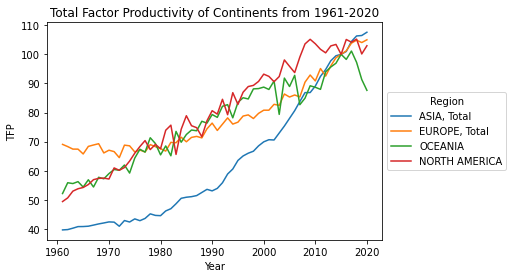

In [ ]:
continents = ['OCEANIA','NORTH AMERICA','EUROPE, Total','ASIA, Total']
df_continent = df[df['Country'].isin(continents)]
fg = sns.lineplot(x='Year', y='TFP_Index', hue='Country', data=df_continent, legend=False)
fg.set(xlabel='Year', ylabel='TFP', title='Total Factor Productivity of Continents from 1961-2020')
plt.legend(bbox_to_anchor=(1,0.5), loc='center left', frameon=True, title='Region', labels=df_continent.Country.unique())
plt.show()

TFP over year for the continents enlighten that interestingly Asia's TFP started out the lowest but had the steepest increase and is now the highest in 2020. The other continents seemed to be about the same increase in overall TFP over the years, but then Oceania dropped off at around 2016.

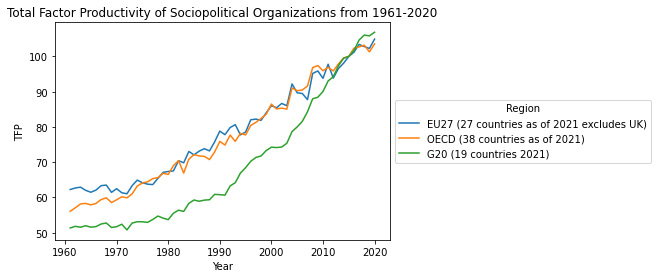

In [ ]:
poli = ['EU27 (27 countries as of 2021 excludes UK)','OECD (38 countries as of 2021)','G20 (19 countries 2021)']
df_poli = df[df['Region'].isin(poli)]
fg = sns.lineplot(x='Year', y='TFP_Index', hue='Region', data=df_poli, legend=False)
fg.set(xlabel='Year', ylabel='TFP', title='Total Factor Productivity of Sociopolitical Organizations from 1961-2020')
plt.legend(bbox_to_anchor=(1,0.5), loc='center left', frameon=True, title='Region', labels=df_poli.Region.unique())
plt.show()

We now explored the sociopoltical organizations of the European Union, G20, and OECD. The european Union and OECD seemed to be step in step with their TFP over time, while the G20 was behind for most of the past 50 years, but then increased more to voertake the other two organizations.

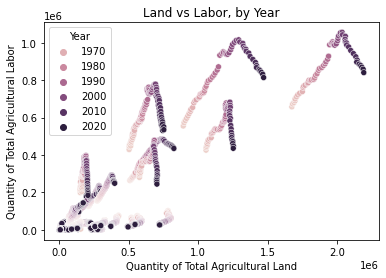

In [ ]:
fg = sns.scatterplot(x='Land_Q', y='Labor_Q', hue='Year', data=df, legend=True)
fg.set(xlabel='Quantity of Total Agricultural Land', ylabel='Quantity of Total Agricultural Labor', title='Land vs Labor, by Year')
plt.show()

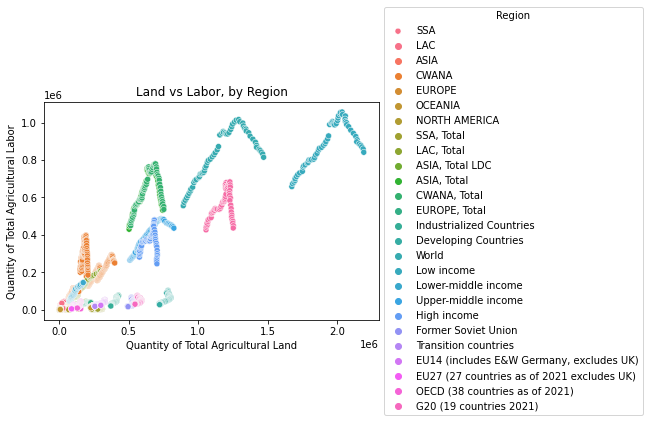

In [ ]:
fg = sns.scatterplot(x='Land_Q', y='Labor_Q', hue='Region', data=df, legend=True)
fg.set(xlabel='Quantity of Total Agricultural Land', ylabel='Quantity of Total Agricultural Labor', title='Land vs Labor, by Region')
plt.legend(bbox_to_anchor=(1,0.5), loc='center left', frameon=True, title='Region', labels=df.Region.unique())
plt.show()

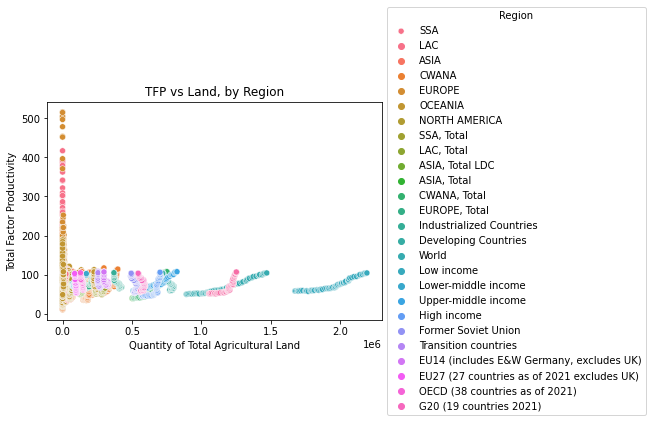

In [ ]:
fg = sns.scatterplot(x='Land_Q', y='TFP_Index', hue='Region', data=df, legend=True)
fg.set(xlabel='Quantity of Total Agricultural Land', ylabel='Total Factor Productivity', title='TFP vs Land, by Region')
plt.legend(bbox_to_anchor=(1,0.5), loc='center left', frameon=True, title='Region', labels=df.Region.unique())
plt.show()

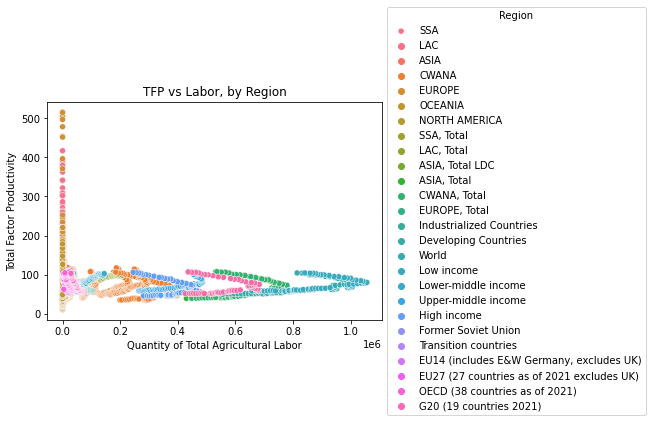

In [ ]:
fg = sns.scatterplot(x='Labor_Q', y='TFP_Index', hue='Region', data=df, legend=True)
fg.set(xlabel='Quantity of Total Agricultural Labor', ylabel='Total Factor Productivity', title='TFP vs Labor, by Region')
plt.legend(bbox_to_anchor=(1,0.5), loc='center left', frameon=True, title='Region', labels=df.Region.unique())
plt.show()

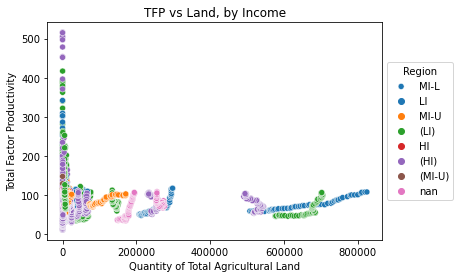

In [ ]:
fg = sns.scatterplot(x='Land_Q', y='TFP_Index', hue='Income', data=df, legend=True)
fg.set(xlabel='Quantity of Total Agricultural Land', ylabel='Total Factor Productivity', title='TFP vs Land, by Income')
plt.legend(bbox_to_anchor=(1,0.5), loc='center left', frameon=True, title='Region', labels=df.Income.unique())
plt.show()

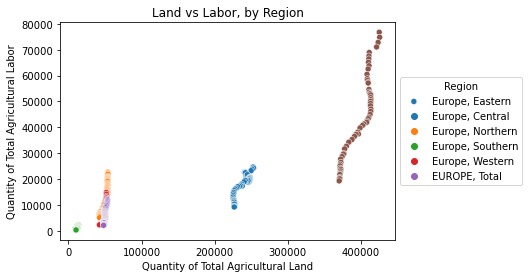

In [ ]:
fg = sns.scatterplot(x='Land_Q', y='Labor_Q', hue='Country', data=df_europe, legend=True)
fg.set(xlabel='Quantity of Total Agricultural Land', ylabel='Quantity of Total Agricultural Labor', title='Land vs Labor, by Region')
plt.legend(bbox_to_anchor=(1,0.5), loc='center left', frameon=True, title='Region', labels=df_europe.Country.unique())
plt.show()

From the 6 graphs above, we wanted to explore if there was a relationship between the quantity of agricultural land and quantity of agricultural labor. We first saw that there was somewhat of a relationship in that it increased intiitally for each region but then started to decreased about 20 years ago. There might have been a change in the turn of the 20th centruy that caused this switch from increase correelation to decreases correlation.

In [ ]:
from sklearn.linear_model import LinearRegression
landq = np.array(df.Land_Q).reshape((-1,1))
laborq = np.array(df.Labor_Q)
reg = LinearRegression().fit(landq, laborq)

r_sq = reg.score(landq, laborq)
print('coefficient of determination:', r_sq)
m = reg.coef_
print('slope:', m)
b = reg.intercept_
print('intercept:', b)

coefficient of determination: 0.7567781966431426
slope: [0.49606942]
intercept: -2291.1000573355086


We then tested our hypothesis that there is a positive relationship between the quantity of agricultural land and quantity of agricultural labor. We performed a linear regression and found that there was a relatively strong relationship between the two with a R^2 = 0.76, meaning 76% of the variance in quantity of agricultural labor can be explained by the quantity of agricultral land.

In conclusion, there is a strong correlation between the quantity of agricultural land and quantity of agricultural labor. We also saw how TFP changes over time based on region. This data could be combined with global warming data or population data for further analysis.